Dla każdego leku w bazie danych podać liczbę szlaków, z którymi dany lek wchodzi w interakcje. Przedstawić wyniki w postaci histogramu z odpowiednio opisanymi osiami.

In [20]:
import pandas as pd
import lxml
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

In [5]:
path = 'data/drugbank_partial.xml'
ns = {'db': 'http://www.drugbank.ca'}

In [6]:
tree = ET.parse(path)
root = tree.getroot()

In [7]:
def unwrap(field, node: ET.Element):
    return getattr(node.find(f"db:{field}", ns), "text", None)

In [33]:
def pathways_df2():
    data = {}  # dict of lists
    for pathway in root.findall('db:drug/db:pathways/db:pathway', ns):
        pathway_name = unwrap("name", pathway)
        for drug in pathway.findall('db:drugs/db:drug', ns):
            drug_name = unwrap("name", drug)
            data.setdefault(drug_name, [])
            data[drug_name].append(pathway_name)
            
    pprint(data)
    counts = {k: len(v) for (k, v) in data.items()}
    pprint(counts)
    
    # Drawing histogram
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    
    plt.xlabel('Drugs')
    plt.ylabel('Pathways count')
    plt.title('Drug-Pathway interaction Histogram')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

{'Abciximab': ['Abciximab Action Pathway'],
 'Alteplase': ['Alteplase Action Pathway'],
 'Anistreplase': ['Anistreplase Action Pathway'],
 'Bivalirudin': ['Bivalirudin Action Pathway'],
 'Calcium': ['Lepirudin Action Pathway',
             'Bivalirudin Action Pathway',
             'Alteplase Action Pathway',
             'Urokinase Action Pathway',
             'Reteplase Action Pathway',
             'Anistreplase Action Pathway',
             'Tenecteplase Action Pathway',
             'Streptokinase Action Pathway'],
 'Cetuximab': ['Cetuximab Action Pathway'],
 'Eptifibatide': ['Eptifibatide Action Pathway'],
 'Lepirudin': ['Lepirudin Action Pathway'],
 'Phylloquinone': ['Lepirudin Action Pathway',
                   'Bivalirudin Action Pathway',
                   'Alteplase Action Pathway',
                   'Urokinase Action Pathway',
                   'Reteplase Action Pathway',
                   'Anistreplase Action Pathway',
                   'Tenecteplase Action Pathway'

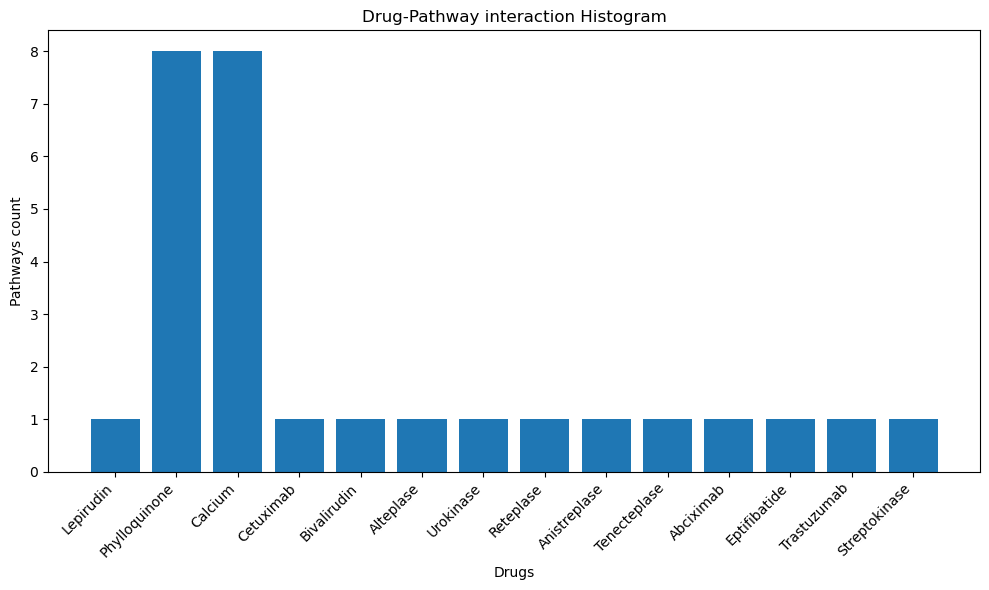

In [34]:
pathways_df2()